In [4]:
import numpy as np
import statistics as st
import pandas as pd 
df=pd.read_csv("Titanic-Dataset.csv",header='infer')

**Ques 1) Generate summary statistics (mean, median, std, etc.)**


In [8]:
columns = ['Age', 'Fare', 'SibSp', 'Parch','Survived','Pclass']
for col in columns:
    data = df[col].dropna()  
    print(f"\nStatistics for '{col}':")
    print(f"Count: {len(data)}")
    print(f"Mean: {np.mean(data)}")
    print(f"Median: {st.median(data)}")
    print(f"Mode: {st.mode(data)}")
    print(f"Standard Deviation: {np.std(data, ddof=1)}") 
    print(f"Min: {np.min(data)}")
    print(f"Max: {np.max(data)}")


Statistics for 'Age':
Count: 714
Mean: 29.69911764705882
Median: 28.0
Mode: 24.0
Standard Deviation: 14.526497332334042
Min: 0.42
Max: 80.0

Statistics for 'Fare':
Count: 891
Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05
Standard Deviation: 49.6934285971809
Min: 0.0
Max: 512.3292

Statistics for 'SibSp':
Count: 891
Mean: 0.5230078563411896
Median: 0
Mode: 0
Standard Deviation: 1.1027434322934317
Min: 0
Max: 8

Statistics for 'Parch':
Count: 891
Mean: 0.38159371492704824
Median: 0
Mode: 0
Standard Deviation: 0.8060572211299483
Min: 0
Max: 6

Statistics for 'Survived':
Count: 891
Mean: 0.3838383838383838
Median: 0
Mode: 0
Standard Deviation: 0.4865924542648575
Min: 0
Max: 1

Statistics for 'Pclass':
Count: 891
Mean: 2.308641975308642
Median: 3
Mode: 3
Standard Deviation: 0.836071240977049
Min: 1
Max: 3


**Ques 2) Create histograms and boxplots for numeric features**

In [10]:

df4=df.copy()
df5=df.copy()

meanage=np.mean(df.loc[~df["Age"].isna(),"Age"])
print(meanage)
df4.loc[df["Age"].isna(),"Age"]=meanage
print(df4.info())

# replacing na in cabin with most frequent value in cabin
# first find the value in cabin
mfcabin=df["Cabin"].mode()[0]
print(mfcabin)
df4.loc[df["Cabin"].isna(),"Cabin"]=mfcabin
print(df4.info())

#replacing NA in embarked with most frequent value in embarked 
#first find the most frequent value
mfembarked=df.loc[:,"Embarked"].mode()[0]
df4.loc[df["Embarked"].isna(), "Embarked"] = mfembarked
#checking
print(mfembarked)

meanage0=np.mean(df.loc[(~df["Age"].isna())&(df["Survived"]==0),"Age"].values)
meanage1=np.mean(df.loc[(~df["Age"].isna())&(df["Survived"]==1),"Age"].values)
print(meanage0)
print(meanage1)
df5.loc[df["Age"].isna()&df["Survived"]==0,"Age"]=meanage0
df5.loc[df["Age"].isna()&df["Survived"]==1,"Age"]=meanage1
print(df5.info())

mfcabin0=df.loc[df["Survived"]==0,"Cabin"].mode()[0]
mfcabin1=df.loc[df["Survived"]==1,"Cabin"].mode()[0]
print(mfcabin0)
print(mfcabin1)
df5.loc[df["Cabin"].isna() & df["Cabin"]==0,"Cabin"]=mfcabin0
df5.loc[df["Cabin"].isna() & df["Cabin"]==1,"Cabin"]=mfcabin1
print(df5.info())

mfembarked0=df.loc[df["Survived"]==0,"Embarked"].mode()[0]
mfembarked1=df.loc[df["Survived"]==1,"Embarked"].mode()[0]
print(mfembarked0)
print(mfembarked1)
df5.loc[df["Cabin"].isna() & df["Embarked"]==0,"Embarked"]=mfembarked0
df5.loc[df["Cabin"].isna() & df["Embarked"]==1,"Embarked"]=mfembarked1
print(df5.info())

29.69911764705882
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
B96 B98
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 no

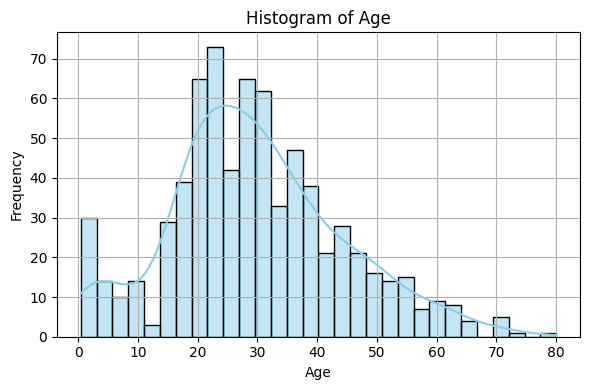

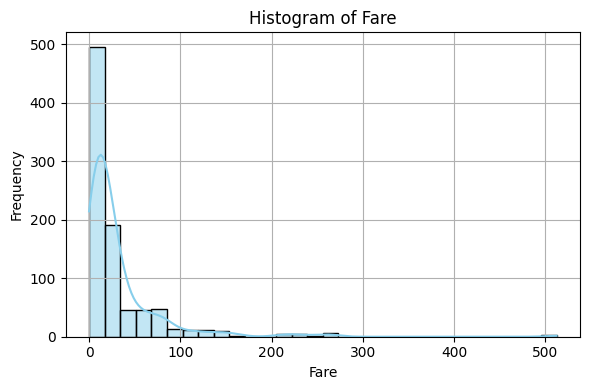

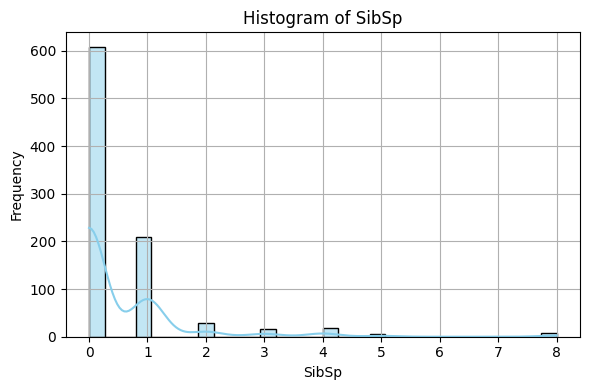

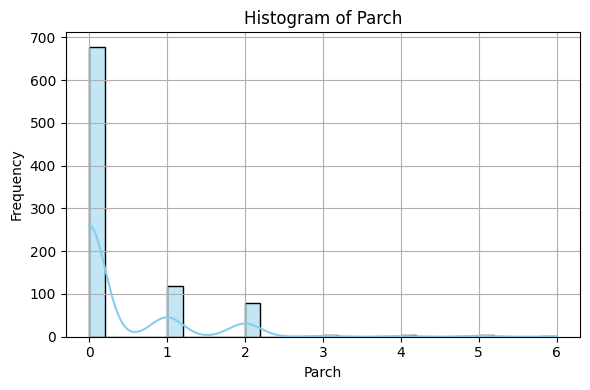

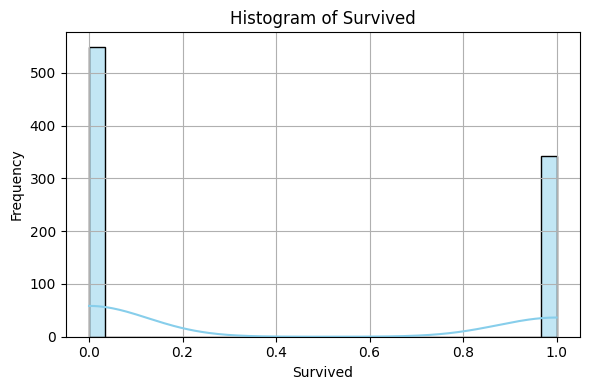

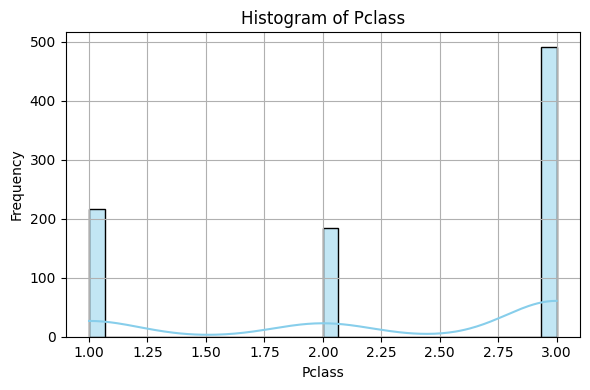

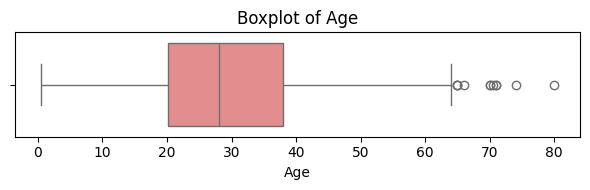

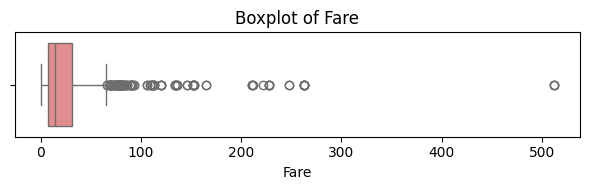

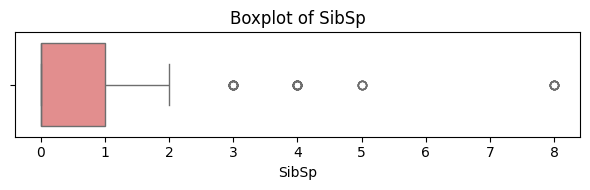

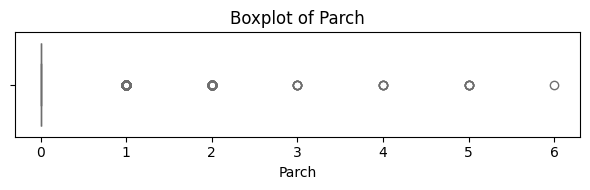

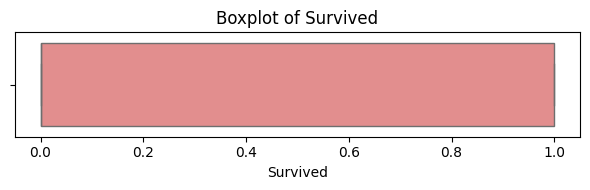

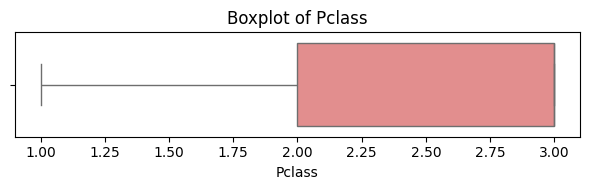

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
columns = ['Age', 'Fare', 'SibSp', 'Parch','Survived','Pclass']
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for col in columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


**Ques 3) Use pairplot/correlation matrix for feature relationships**

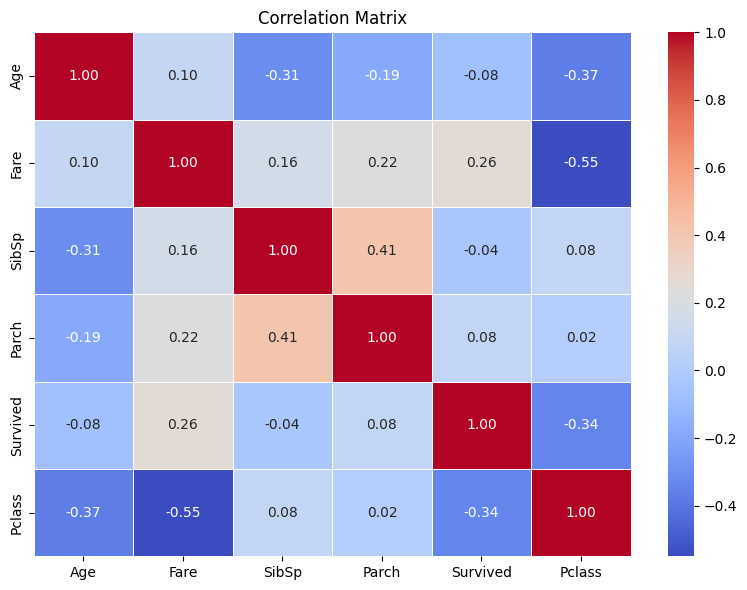

In [13]:
corr_matrix = df[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


**Ques 4) Identify patterns, trends, or anomalies in the data**
**Ques 5) Make basic feature-level inferences from visuals*

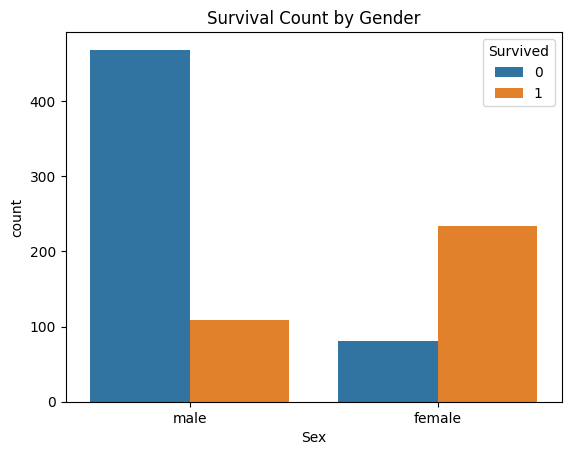

In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()



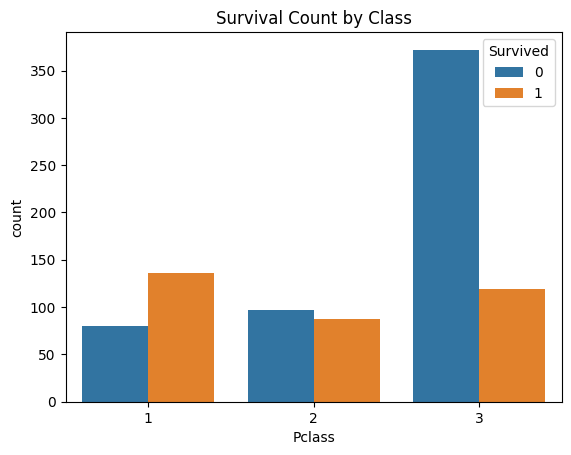

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Class")
plt.show()


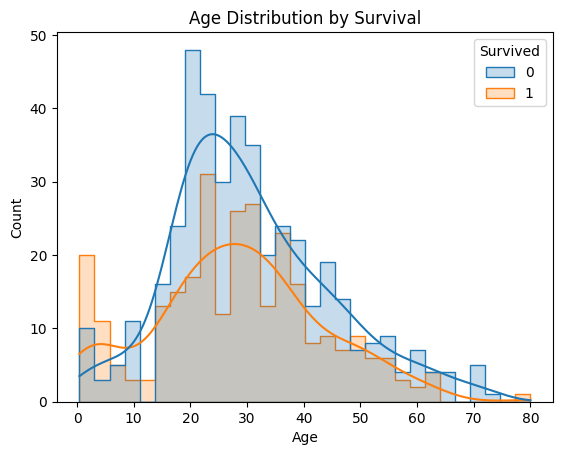

In [20]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step')
plt.title("Age Distribution by Survival")
plt.show()